In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [204]:
raw_data = pd.read_csv('C:\data\Arrest_Data_from_2010_to_2019.csv')

In [205]:
raw_data.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [206]:
#setting a new index and removing the unwanted columns
data= raw_data.set_index('Report ID')
data.drop(['Time', 'Sex Code', 'Descent Code', 'Arrest Type Code', 
                                          'Charge', 'Charge Description'], axis= 1, inplace=True)
data.head()

,Arrest Date,Area ID,Area Name,Reporting District,Age,Charge Group Code,Charge Group Description,Address,Cross Street,Location
Report ID,,,,,,,,,,
191811472,05/03/2019,18,Southeast,1802,23,NaN,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
5614161,04/29/2019,8,West LA,842,41,3.0,Robbery,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
5615197,04/30/2019,6,Hollywood,663,27,5.0,Burglary,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
5615701,04/30/2019,9,Van Nuys,901,2,NaN,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
5615929,04/30/2019,20,Olympic,2049,41,4.0,Aggravated Assault,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [207]:
# checking for missing values 
missing_values = data.isnull().sum()
print(missing_values)

Arrest Date                      0
Area ID                          0
Area Name                        0
Reporting District               0
Age                              0
Charge Group Code            88029
Charge Group Description     88550
Address                          0
Cross Street                562466
Location                         0
dtype: int64


In [208]:
#replacing the missing values 
data["Charge Group Description"].fillna("Unknown", inplace=True)
data["Charge Group Description"].fillna("Unknown", inplace=True)
data["Cross Street"].fillna("UNKNOWN", inplace=True)
#checking if the missing values are filled 
missing_values = data.isnull().sum()
print(missing_values)

Arrest Date                 0
Area ID                     0
Area Name                   0
Reporting District          0
Age                         0
Charge Group Code           0
Charge Group Description    0
Address                     0
Cross Street                0
Location                    0
dtype: int64


In [209]:
#assessing the quality of the data
#checking the data types 
data.dtypes

Arrest Date                 object
Area ID                      int64
Area Name                   object
Reporting District           int64
Age                          int64
Charge Group Code           object
Charge Group Description    object
Address                     object
Cross Street                object
Location                    object
dtype: object

In [210]:
#changing the datatype of ArrestDate to datetime
data['Arrest Date']= pd.to_datetime(data['Arrest Date'])
#changing the data type of Area Name, Charge Group Description, Address, Cross Street to string 
for column in ['Area Name', 'Charge Group Description', 'Address', 'Cross Street']: 
    data[column] = data[column].astype(str)
#changing the Location data into a more readable format 
data[['Latitude', 'Longitude']] = data['Location'].str.extract(r'\((.*), (.*)\)').astype(float)
data.drop(['Location'], axis=1, inplace=True)
data.dtypes

Arrest Date                 datetime64[ns]
Area ID                              int64
Area Name                           object
Reporting District                   int64
Age                                  int64
Charge Group Code                   object
Charge Group Description            object
Address                             object
Cross Street                        object
Latitude                           float64
Longitude                          float64
dtype: object

In [211]:
data.head()

,Arrest Date,Area ID,Area Name,Reporting District,Age,Charge Group Code,Charge Group Description,Address,Cross Street,Latitude,Longitude
Report ID,,,,,,,,,,,
191811472,2019-05-03,18,Southeast,1802,23,Unknown,Unknown,91ST,FIGUEROA,33.9543,-118.2827
5614161,2019-04-29,8,West LA,842,41,3.0,Robbery,11600 WILSHIRE BL,UNKNOWN,34.0508,-118.4592
5615197,2019-04-30,6,Hollywood,663,27,5.0,Burglary,LA BREA,LEXINGTON,34.0907,-118.3384
5615701,2019-04-30,9,Van Nuys,901,2,Unknown,Unknown,RAYMER,SEPULVEDA BL,34.2149,-118.4674
5615929,2019-04-30,20,Olympic,2049,41,4.0,Aggravated Assault,8TH ST,VERMONT,34.0578,-118.2916


In [212]:
#1 how many bookings of arrestees were made in 2018?

#creating a subset with arrest data from 2018
data_2018= data[data["Arrest Date"].dt.year == 2018]

#counting the number of data entries, which corresponds to the number of arrests 
num_arrests_2018 = len(data_2018)
print(f"{num_arrests_2018} were made in 2018.")

104277 were made in 2018.


In [213]:
#2 How many bookings of arrestees were made in the area with the most arrests in 2018?
area_arrest_2018 = data_2018['Area Name'].value_counts().max()
print(f'{area_arrest_2018} arrests were made in the area with the most arrests in 2018.')

10951 arrests were made in the area with the most arrests in 2018.


In [214]:
#3 What is the 95% quantile of the age of the arrestee in 2018? 
#Only consider the following charge groups for your analysis: 
#Vehicle Theft, Robbery, Burglary, Receive Stolen Property.

charge_groups= ['Vehicle Theft', 'Robbery', 'Burglary', 'Receive Stolen Property']

#creating a subset with the required charge groups 
group_data_2018 = data_2018[data_2018['Charge Group Description'].isin(charge_groups)]

#calculating the 95% quantile 
percentile_95 = int(group_data_2018['Age'].quantile(0.95))

print(f'The 95% quantile of the age of the arrestee in 2018 is {percentile_95}.')

The 95% quantile of the age of the arrestee in 2018 is 52.


In [215]:
# 4. There are differences between the average age of an arrestee for the various 
# charge groups. Are these differences statistically significant? For this question, 
# calculate the Z-score of the average age for each charge group. Report the 
# largest absolute value among the calculated Z-scores. (Only consider data for 
# 2018. Do not consider "Pre-Delinquency" and "Non-Criminal Detention" as these 
# charge groups are reserved for minors. Exclude any arrests where the charge 
# group description is not known.)

#filtering out the minors and unknown crime category 
Q4_data_2018= data_2018[(data_2018["Charge Group Description"] != "Pre-Delinquency") & 
                          (data_2018["Charge Group Description"] != "Non-Criminal Detention") & 
                          (data_2018["Charge Group Description"] != "Unknown")]

#calculating the average age for each crime category 
avg_age = Q4_data_2018.groupby('Charge Group Description')['Age'].mean().reset_index()


#calculating the mean and std deviation for the whole dataset 
overall_mean_age = Q4_data_2018['Age'].mean()
overall_std_age = Q4_data_2018['Age'].std()

#calculating the z-score for the mean age of different charge groups
avg_age['Z-score'] = (avg_age['Age'] - overall_mean_age)/overall_std_age

highest_zscore= round(avg_age['Z-score'].max(), 4)

print(f'The highest absolute value of z-score is {highest_zscore}')

The highest absolute value of z-score is 0.6934


Hence, the difference between the average age of an arrestee for the various charge groups is not statistically significant 
since the absolute z-score is below the critical value of 1.96 (for 95% confidence level) or 2.58 (for 99% confidence level)

In [216]:
#5. How many arrest incidents occurred within 2 km from the Bradbury Building in 2018? 

#removing the rows with no location data 
com_loc_2018= data_2018[(data_2018["Latitude"] != 0) | (data_2018["Latitude"] != 0)]

#specifying the required variables for the calculation of distance 
lat1= 34.050536
long1= -118.247861
radius= 6371000 #in meters 

#define function to calculate the distance between two locations
def distance(lat2, long2): 
    lat_diff= deg_to_rad(lat2-lat1)
    long_diff= deg_to_rad(long2-long1)
    mean_lat = deg_to_rad((lat1+lat2)/2)
    return radius*np.sqrt(lat_diff**2+(np.cos(mean_lat)*long_diff)**2)
    
#define function to convert degree to radian 
def deg_to_rad(deg): 
    return (np.pi*deg)/180

#calculating the distance betwen the arrest point and Bradbury Building
com_loc_2018.loc[:, "Distance"] = distance(com_loc_2018["Latitude"], com_loc_2018["Longitude"])

#counting the required number of arrests 
num_arrests= len(com_loc_2018[com_loc_2018["Distance"] <= 2000])

print(f'There were {num_arrests} arrests within 2km of the Bradbury Building in 2018.')

There were 11461 arrests within 2km of the Bradbury Building in 2018.


C:\Users\mohit\AppData\Local\Temp\ipykernel_8752\1349858184.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_loc_2018.loc[:, "Distance"] = distance(com_loc_2018["Latitude"], com_loc_2018["Longitude"])


In [217]:
# 6. How many arrest incidents were made per kilometer on Pico Boulevard during 2018?

#creating a subset with "pico" in the address
pic_data_2018 = data_2018[data_2018['Address'].str.contains('PICO')]

#calculating the mean and standard deviation to identify the outliers 
lat_mean_pic= pic_data_2018["Latitude"].mean()
long_mean_pic= pic_data_2018["Longitude"].mean()
lat_stdev_pic= pic_data_2018["Latitude"].std()
long_stdev_pic= pic_data_2018["Longitude"].std()

#filtering out the outliers 
filtered_pic_data_2018 = pic_data_2018[(pic_data_2018["Latitude"] < (lat_mean_pic + 2*lat_stdev_pic)) &
                                       (pic_data_2018["Latitude"] > (lat_mean_pic - 2*lat_stdev_pic)) & 
                                       (pic_data_2018["Longitude"] < (long_mean_pic + 2*long_stdev_pic)) & 
                                       (pic_data_2018["Longitude"] > (long_mean_pic - 2*long_stdev_pic))]

#finding the diff in longitudes 
diff_long_pico= max(filtered_pic_data_2018["Longitude"]) - min(filtered_pic_data_2018["Longitude"])

#finding the length of pico 
length_pico= (radius*deg_to_rad(diff_long_pico))/1000 #since the area stretches from east to west, latitude difference is neglected
                                               #in the calculation 
#finding the arrest incidents per km 
arrest_per_km= round(len(filtered_pic_data_2018)/length_pico, 2)
print(f'There were {arrest_per_km} arrests per km on Pico Boulevard during 2018.')

There were 22.95 arrests per km on Pico Boulevard during 2018.


In [218]:
# 7. Some types of arrest incidents in certain areas occur at a highly disproportionate 
# rate compared to their frequency city-wide. Calculate this ratio for all charge group code 
# and area ID pairs. You can view this ratio as the ratio of the conditional probability of 
# an arrest incident of a charge group code given that it occurred in an area ID to the 
# unconditional probability of the arrest incident of a charge group. Report the average of the top 
# 5 of the calculated ratio.

#creating a subset with data before 2019
before_2019= data[data['Arrest Date'] < pd.Timestamp('2019-01-01')]

#removing the records that either don't have a charge group code or with value 99 
filt_before_2019= before_2019[(before_2019["Charge Group Code"] != "Unknown") &
                             (before_2019["Charge Group Code"] != "99")]

#grouping the data to calculate the total arrests citywide for each charge 
arrests_citywide = filt_before_2019.groupby('Charge Group Description').size().reset_index(name='Total arrests citywide')

#grouping the data to calculate the total arrests for various charges in each city 
arrests_by_area = filt_before_2019.groupby(['Charge Group Description', 'Area Name']).size().reset_index(name='Arrests by area')

#merging the dataset to calculate the ratio 
merged_data = pd.merge(arrests_by_area, arrests_citywide, on='Charge Group Description')

#creating a column with the corresponding ratio 
merged_data['Ratio'] = merged_data['Arrests by area'] / merged_data['Total arrests citywide']

#filtering out the top 5 ratio and calculating the average 
average_top5_ratio = round(merged_data.nlargest(5, 'Ratio')['Ratio'].mean(), 4)

print(f'The average of the top 5 calculated ratio is {average_top5_ratio}.')

The average of the top 5 calculated ratio is 0.256.


In [219]:
#8. Felony arrest incidents have been dropping over the years. Using a trend line 
# (linear estimation) for the data from 2010 and 2018 (inclusive), what is the 
# projected number of felony arrests in 2019?

#observing the crime categories to filter out the felonies 
data["Charge Group Description"].unique()

array(['Unknown', 'Robbery', 'Burglary', 'Aggravated Assault',
       'Miscellaneous Other Violations', 'Drunkeness', 'Larceny',
       'Liquor Laws', 'Narcotic Drug Laws', 'Disorderly Conduct',
       'Prostitution/Allied', 'Disturbing the Peace',
       'Driving Under Influence', 'Gambling', 'Sex (except rape/prst)',
       'Fraud/Embezzlement', 'Receive Stolen Property', 'Other Assaults',
       'Homicide', 'Weapon (carry/poss)', 'Vehicle Theft',
       'Against Family/Child', 'Forgery/Counterfeit',
       'Moving Traffic Violations', 'Non-Criminal Detention', 'Rape',
       'Federal Offenses', 'Pre-Delinquency'], dtype=object)

C:\Users\mohit\AppData\Local\Temp\ipykernel_8752\543631607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fel_data.loc[:,'Arrest Year'] = fel_data['Arrest Date'].dt.year


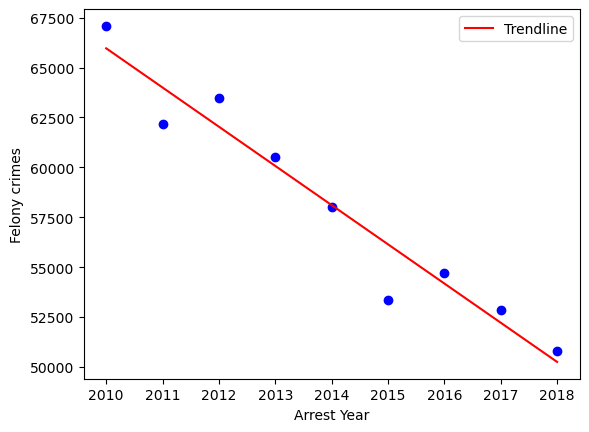

Predicted number of felonies in 2019 is 48289.


In [220]:
#creating a list that has all the non-felony crimes 
non_felony= ['Unknown','Miscellaneous Other Violations', 'Drunkeness', 'Liquor Laws','Disorderly Conduct', 'Disturbing the Peace',
            'Driving Under Influence', 'Gambling', 'Sex (except rape/prst)', 'Moving Traffic Violations',
             'Non-Criminal Detention', 'Pre-Delinquency']

#creating a subset having data from 2010-2018 with only felonies 
time_data = data[data["Arrest Date"].dt.year.isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])]
fel_data = time_data[~time_data["Charge Group Description"].isin(non_felony)]    
fel_data.loc[:,'Arrest Year'] = fel_data['Arrest Date'].dt.year

#grouping the data based on year 
raw_trend_data= fel_data.groupby('Arrest Year').count().reset_index()
#restructuring the dataframe to make it more suitable for visualization 
trend_data= raw_trend_data.iloc[:, :2]
trend_data.rename(columns={'Arrest Date': 'Felony crimes'}, inplace=True)

# Creating a linear trendline based on the data 
coefficients = np.polyfit(trend_data["Arrest Year"], trend_data["Felony crimes"], 1)
trendline = np.polyval(coefficients, trend_data["Arrest Year"])

# Plotting the data points and the trend line 
plt.scatter(trend_data["Arrest Year"], trend_data["Felony crimes"], color='blue')
plt.plot(trend_data["Arrest Year"], trendline, color='red', label='Trendline')
plt.xlabel('Arrest Year')
plt.ylabel('Felony crimes')
plt.legend()
plt.show()

#predicting the no of felonies in 2019
pred_2019 = round(np.polyval(coefficients, 2019))
print(f'Predicted number of felonies in 2019 is {pred_2019}.')